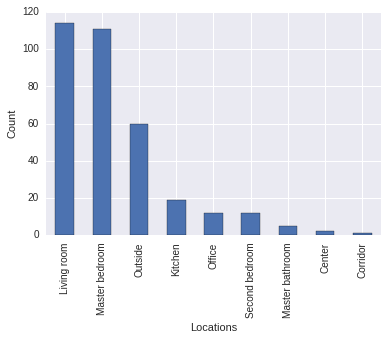

In [45]:
%run ../Evaluation/LoadAndReduceData.ipynb

In [46]:
plt.style.use('bmh')
colors = ['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00', 
          '#CC79A7', '#56B4E9', '#009E73', '#F0E442', '#0072B2']

In [48]:
import pymc

living_room_data = dataset[dataset['location_name'].isin(['Living room'])]
#Model
mu = pymc.Uniform('mu', lower=-np.pi, upper=np.pi)
kappa = pymc.Uniform('kappa', lower=0.0, upper=100.0)
y = pymc.VonMises('y',mu, kappa, value=living_room_data['circular_minute'].values, observed=True)

model = pymc.MCMC([mu, kappa, y])
model.sample(iter=1000, burn=500, thin=2)
print ( " mu : " , mu.value , " kappa : " , kappa.value)

 [-----------------100%-----------------] 1000 of 1000 complete in 17.4 sec mu :  1.7457163492600518  kappa :  0.9286421467212851


In [49]:
import pymc

living_room_data = dataset[dataset['location_name'].isin(['Living room'])]
#Model
mu = pymc.Uniform('mu', lower=-np.pi, upper=np.pi)
kappa = pymc.Uniform('kappa', lower=0.0, upper=100.0)
y = pymc.Normal('y',mu, kappa, value=living_room_data['circular_minute'].values, observed=True)
model = pymc.MCMC([mu, kappa, y])
model.sample(iter=1000, burn=500, thin=2)
print ( " mu : " , mu.value , " kappa : " , kappa.value)

 [-----------------100%-----------------] 1000 of 1000 complete in 3.3 sec mu :  1.2315314414755532  kappa :  0.38083356045703853


In [85]:
dataset['location_name'].unique()
mu_and_kappa = pd.DataFrame({'location':dataset['location_name'].unique(),
                             'mu' : 0.0,
                             'kappa' : 0.0})
mu_and_kappa.index = dataset['location_name'].unique()


In [86]:
import pymc

for name in mu_and_kappa.location:
    print (name) 
    living_room_data = dataset[dataset['location_name'].isin([name])]
    #Model
    mu = pymc.Uniform('mu', lower=-np.pi, upper=np.pi)
    kappa = pymc.Uniform('kappa', lower=0.0, upper=100.0)
    y = pymc.VonMises('y',mu, kappa, value=living_room_data['circular_minute'].values, observed=True)

    model = pymc.MCMC([mu, kappa, y])
    model.sample(iter=1000, burn=500, thin=2)
    print()
    print (name , " mu : " , mu.value , " kappa : " , kappa.value)
    mu_and_kappa.loc[name, 'mu'] = mu.value
    mu_and_kappa.loc[name, 'kappa'] = kappa.value
    
mu_and_kappa

Master bedroom
 [-----------------100%-----------------] 1000 of 1000 complete in 15.3 sec
Master bedroom  mu :  -2.102837210885127  kappa :  2.0298233841173725
Master bathroom
 [-----------------100%-----------------] 1000 of 1000 complete in 1.3 sec
Master bathroom  mu :  -0.6758105474595363  kappa :  1.3115781881628767
Living room
 [-----------------100%-----------------] 1000 of 1000 complete in 15.3 sec
Living room  mu :  1.7439223276004034  kappa :  0.9418493725003698
Kitchen
 [-----------------100%-----------------] 1000 of 1000 complete in 2.5 sec
Kitchen  mu :  0.5667121385600152  kappa :  1.1111686476983056
Second bedroom
 [-----------------100%-----------------] 1000 of 1000 complete in 1.8 sec
Second bedroom  mu :  0.8674061864167756  kappa :  0.5857016962725798
Center
 [-----------------100%-----------------] 1000 of 1000 complete in 0.3 sec
Center  mu :  0.7904333240591593  kappa :  0.9872973903545539
Outside
 [-----------------100%-----------------] 1000 of 1000 complete

,kappa,location,mu
Master bedroom,2.029823,Master bedroom,-2.102837
Master bathroom,1.311578,Master bathroom,-0.675811
Living room,0.941849,Living room,1.743922
Kitchen,1.111169,Kitchen,0.566712
Second bedroom,0.585702,Second bedroom,0.867406
Center,0.987297,Center,0.790433
Outside,2.150960,Outside,0.339314
Corridor,0.528589,Corridor,0.051096
Office,1.927408,Office,1.028700
Second bathroom,1.277403,Second bathroom,0.737306


In [163]:
import pymc 
import scipy.stats as stats
mu_and_kappa['lower_index'] = stats.vonmises.interval(0.9, mu_and_kappa['kappa'])[0] + mu_and_kappa['mu']
mu_and_kappa['upper_index'] = stats.vonmises.interval(0.9, mu_and_kappa['kappa'])[1] + mu_and_kappa['mu']
mu_and_kappa['error'] = stats.vonmises.interval(stats.vonmises.pdf(0, mu_and_kappa['kappa']), mu_and_kappa['kappa'])[1]
mu_and_kappa['indices'] = np.arange(10)
mu_and_kappa['y_error'] = stats.vonmises.pdf(0, mu_and_kappa['kappa'])

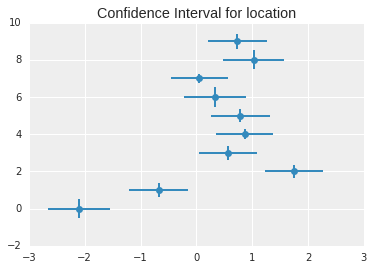

In [164]:
import numpy as np
import matplotlib.pyplot as plt

# example data
x = mu_and_kappa['mu']
y = mu_and_kappa['indices']

# example variable error bar values
xerr = mu_and_kappa['error']
yerr = mu_and_kappa['y_error']
# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o')
plt.title("Confidence Interval for location")

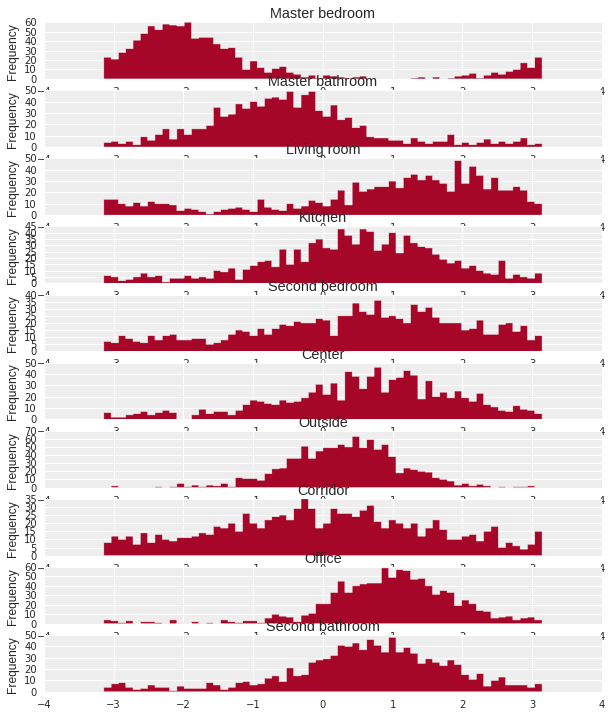

In [133]:

fig = plt.figure(figsize=(10,12))
fig.add_subplot(10,1,1)
for index, row in mu_and_kappa.iterrows():
    fig.add_subplot(10,1,row['indices']+1)
    y_pred = pymc.rvon_mises( row['mu'], row['kappa'], size=(1000,) )
    
    _ = plt.hist(y_pred,range=[-np.pi, np.pi], bins=60, histtype='stepfilled', color=colors[1])   
    _ = plt.ylabel('Frequency')
    _ = plt.title(index)



mu 1.7416559613319573
kappa 0.9410869227257712
(8000,)


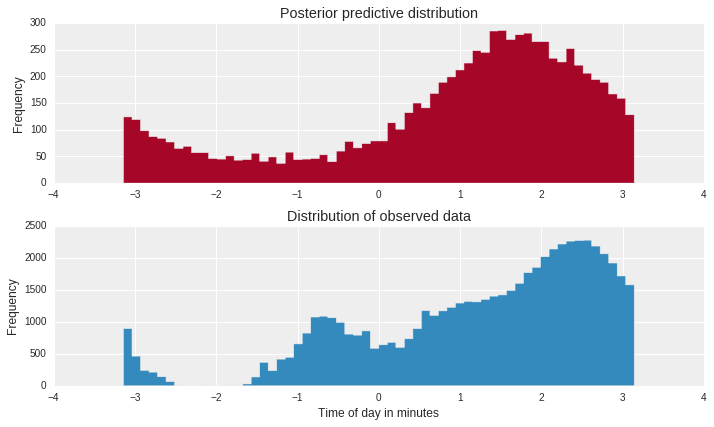

In [8]:
print ('mu',mu.value)
print ('kappa',kappa.value)


y_pred = pymc.rvon_mises( mu.value, kappa.value, size=(8000,) )
print (y_pred.shape)

fig = plt.figure(figsize=(10,6))
fig.add_subplot(211)

fig.add_subplot(211)

_ = plt.hist(y_pred,range=[-np.pi, np.pi], bins=60, histtype='stepfilled', color=colors[1])   
_ = plt.ylabel('Frequency')
_ = plt.title('Posterior predictive distribution')

fig.add_subplot(212)

_ = plt.hist(living_room_data['circular_minute'].values, range=[-np.pi, np.pi], bins=60, histtype='stepfilled')
_ = plt.xlabel('Time of day in minutes')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of observed data')

plt.tight_layout()

In [68]:
import numpy as np
from pymc3 import *

model = Model()
with model:

    k = 5
    a = constant(np.array([2, 3., 4, 2, 2]))

    p = Dirichlet('p', a, shape=k)
    c = Categorical('c', p, observed=np.random.randint(0, k, 50))

def run(n=3000):
    if n == "short":
        n = 50
    with model:
        step = Slice()
        trace = sample(n, step)
        traceplot(trace, varnames=['p'])

run(n='short')

print(p[0])

Applied stickbreaking-transform to p and added transformed p_stickbreaking to model.


KeyboardInterrupt: 

AttributeError: 'function' object has no attribute 'get_values'

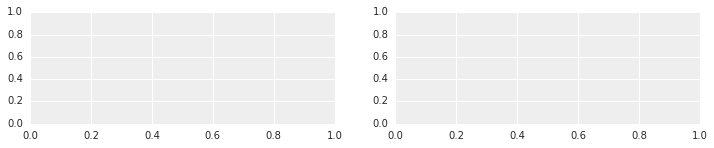

In [150]:
traceplot(trace, varnames=['p']);

# Bayes Factor 
https://github.com/pymc-devs/pymc/wiki/BayesFactor

In [22]:
#!/usr/bin/env python
# encoding: utf-8
"""
bayesfactor.py

Computation of Bayes factor for comparing two models, following the example in 
panel 7.1 in Link and Barker (2010). The posterior model probabilities are the 
product of the BF and the prior probabilities, so the BF can be calculated by 
dividing the posterior odds (the inverse of the complement of the mean of 
'true_model' int the model below) by the prior odds.

Created by Christopher J. Fonnesbeck on 2010-12-15.
Copyright (c) 2010 Vanderbilt University. All rights reserved.
"""

from pymc import Uniform, Lambda, observed, Bernoulli, geometric_like, poisson_like

# Data
Y = [0,1,2,3,8]

# Prior model probabilities
pi = (0.1, 0.9)

# Index to true model
true_model = Bernoulli('true_model', p=pi[1], value=0)

# Poisson mean
mu = Uniform('mu', lower=0, upper=1000, value=4)

# Geometric probability
p = Lambda('p', lambda mu=mu: 1/(1+mu))

@observed
def Ylike(value=Y, mu=mu, p=p, M=true_model):
    """Either Poisson or geometric, depending on M"""
    if M:
        return poisson_like(value, mu)
    return geometric_like(value+1, p)

In [44]:
import pymc
model = pymc.MCMC([true_model, mu, p, Ylike])
model.sample(iter=1000, burn=500, thin=2)
true_model.stats()['mean']
#print (name , " mu : " , mu.value , " kappa : " , kappa.value)

 [-----------------100%-----------------] 1000 of 1000 complete in 0.2 sec

0.35599999999999998

In [7]:
print (true_model.value)
print (mu.value)
print (p.value)

True
3.2372469309607883
0.236002294956


In [61]:
import pymc

living_room_data = dataset[dataset['location_name'].isin(['Living room'])]
#Model
mu = pymc.Uniform('mu', lower=-np.pi, upper=np.pi)
mu_1 = pymc.Uniform('mu_1', lower=-np.pi, upper=np.pi)
kappa = pymc.Uniform('kappa', lower=0.0, upper=100.0)
sigma = pymc.Uniform('sigma', lower=0.0, upper=10.0)
#y = pymc.VonMises('y',mu, kappa, value=living_room_data['circular_minute'].values, observed=True)

# Prior model probabilities
pi = (0.1, 0.9)

# Index to true model
true_model = Bernoulli('true_model', p=pi[1], value=0)

@observed
def Ylike(value=living_room_data['circular_minute'].values,
          mu=mu, kappa=kappa, mu_1=mu_1, sigma=sigma, M=true_model):
    """Either Poisson or geometric, depending on M"""
    if M:
        return pymc.von_mises_like(value, mu, kappa)
    
    return pymc.normal_like(value+1, mu_1, sigma)


model = pymc.MCMC([true_model, mu, kappa, mu_1, sigma, Ylike])
model.sample(iter=1000, burn=500, thin=2)
print (" mu : " , mu.value , " kappa : " , kappa.value)

 [-----------------100%-----------------] 1000 of 1000 complete in 20.2 sec mu :  -1.0452725937958853  kappa :  1.1996926841278686


In [85]:
pm3.Normal?

In [86]:
import pymc3 as pm

with pm.Model() as model:
    mu = pm.Uniform('mu', lower=-np.pi, upper=np.pi)
    kappa = pm.Uniform('kappa', lower=0, upper=100)
    
    #y_pred = pm.VonMises('y_pred', mu=mu, kappa=kappa)
    y_pred = pm.Normal('y_pred', mu=mu, sd=kappa)
    #y_est = pm.VonMises('y_est', mu=mu, kappa=kappa, observed=living_room_data['circular_minute'].values)
    y_est = pm.Normal('y_est', mu=mu, sd=kappa, observed=living_room_data['circular_minute'].values)
    
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(20000, step, start=start, progressbar=True)

Applied interval-transform to mu and added transformed mu_interval to model.
Applied interval-transform to kappa and added transformed kappa_interval to model.

INFO (theano.gof.compilelock): Refreshing lock /home/deebuls/.theano/compiledir_Linux-3.16--generic-x86_64-with-debian-jessie-sid-x86_64-3.5.2-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/deebuls/.theano/compiledir_Linux-3.16--generic-x86_64-with-debian-jessie-sid-x86_64-3.5.2-64/lock_dir/lock



 [-----------------100%-----------------] 20000 of 20000 complete in 19.6 sec

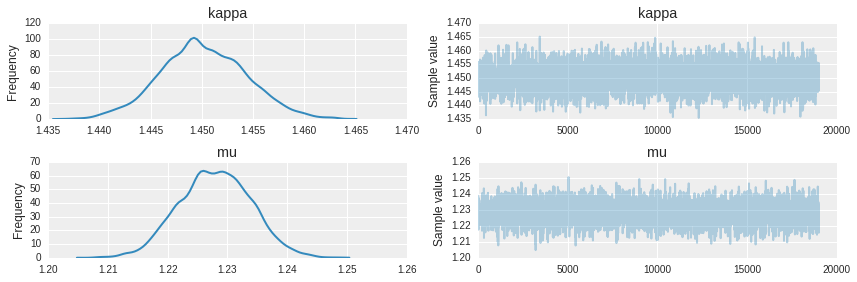

In [87]:
burnin = 1000
_ = pm.traceplot(trace[burnin:], varnames=['kappa', 'mu'])

In [93]:
d = np.random.vonmises( 3, 10, size=1000)

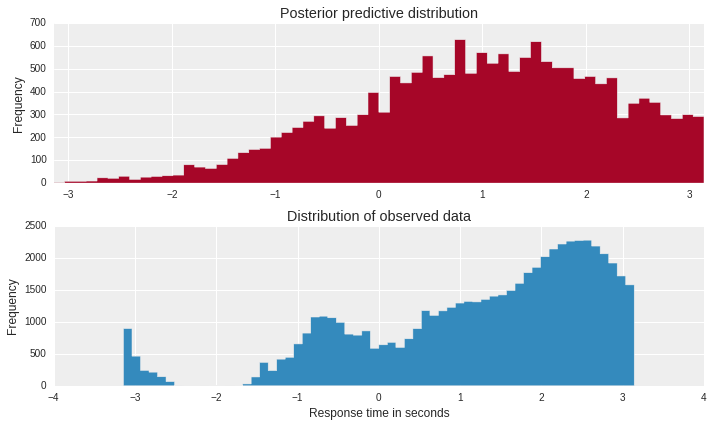

In [88]:
x_lim = 60
y_pred = trace[burnin:].get_values('y_pred')

fig = plt.figure(figsize=(10,6))
fig.add_subplot(211)

fig.add_subplot(211)

_ = plt.hist(y_pred, range=[-np.pi, np.pi], bins=x_lim, histtype='stepfilled', color=colors[1])   
_ = plt.xlim(-np.pi, np.pi)
_ = plt.ylabel('Frequency')
_ = plt.title('Posterior predictive distribution')

fig.add_subplot(212)

_ = plt.hist(living_room_data['circular_minute'].values, range=[-np.pi, np.pi], bins=x_lim, histtype='stepfilled')
_ = plt.xlabel('Response time in seconds')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of observed data')

plt.tight_layout()

Applied interval-transform to mu_n and added transformed mu_n_interval to model.
Applied interval-transform to sigma and added transformed sigma_interval to model.
Applied interval-transform to mu_von and added transformed mu_von_interval to model.
Applied interval-transform to kappa and added transformed kappa_interval to model.

INFO (theano.gof.compilelock): Refreshing lock /home/deebuls/.theano/compiledir_Linux-3.16--generic-x86_64-with-debian-jessie-sid-x86_64-3.5.2-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/deebuls/.theano/compiledir_Linux-3.16--generic-x86_64-with-debian-jessie-sid-x86_64-3.5.2-64/lock_dir/lock



 [-----------------100%-----------------] 20000 of 20000 complete in 20.0 sec

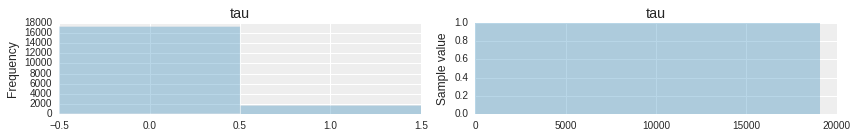

In [94]:
     
burnin = 1000
with pm.Model() as model:
    # Index to true model
    prior_model_prob = 0.5
    #tau = pm.DiscreteUniform('tau', lower=0, upper=1)
    tau = pm.Bernoulli('tau', prior_model_prob)
    
    # Poisson parameters
    mu_n = pm.Uniform('mu_n', lower=-np.pi, upper=np.pi)
    sigma = pm.Uniform('sigma', lower=0, upper=100)

    # Negative Binomial parameters
    mu_von = pm.Uniform('mu_von', lower=-np.pi, upper=np.pi)
    kappa = pm.Uniform('kappa', lower=0, upper=100)

    y_like = pm.DensityDist('y_like',
             lambda value: pm.switch(tau, 
                 pm.Normal.dist(mu_n, sigma).logp(value),
                 pm.VonMises.dist(mu_von, kappa).logp(value)
             ),
             #observed=living_room_data['circular_minute'].values)
             observed=d)
    
    start = pm.find_MAP()
    step1 = pm.Metropolis([mu_n, sigma, mu_von, kappa])
    step2 = pm.ElemwiseCategoricalStep(vars=[tau], values=[0,1])
    trace = pm.sample(20000, step=[step1, step2], start=start)

_ = pm.traceplot(trace[burnin:], varnames=['tau'])

In [95]:
# Compute the Bayes factor
prob_pois = trace[burnin:]['tau'].mean()
prob_nb = 1 - prob_pois
BF = (prob_nb/prob_pois)*(prior_model_prob/(1-prior_model_prob))
print("Bayes Factor: %s" % BF)

Bayes Factor: 10.3095238095
